<a href="https://colab.research.google.com/github/ChitrakCDB/MachineLearningAlgorithms/blob/main/WorldCup_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
from google.colab import drive #to import the google drive data

In [ ]:
drive.mount('/content/drive')   # to mount the drive data into the colab cloud and enter the activation code

Mounted at /content/drive


In [ ]:
cd /content/drive/"My Drive/Colab Notebooks/Files" 

/content/drive/My Drive/Colab Notebooks/Files


In [ ]:
data=pd.read_csv('WCresults.csv')
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
data.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [ ]:
data["Year"]=pd.to_datetime(data['date']).dt.year
data["Month"]=pd.to_datetime(data['date']).dt.month
data=data.drop(columns=['date'], axis=1)
data.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year,Month
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11
1,England,Scotland,4,2,Friendly,London,England,False,1873,3
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3
3,England,Scotland,2,2,Friendly,London,England,False,1875,3
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3


In [ ]:
data['total_score']=data['home_score']+data['away_score']
data.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year,Month,total_score
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,0
1,England,Scotland,4,2,Friendly,London,England,False,1873,3,6
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,3
3,England,Scotland,2,2,Friendly,London,England,False,1875,3,4
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,3


In [ ]:
con=[(data['home_score']==data['away_score']),(data['home_score']>data['away_score']),(data['home_score']<data['away_score'])]
val=[0,1,2]
val2=['no_win',data['home_team'],data['away_team']]
data['result']=np.select(con,val)
data['who_win']=np.select(con,val2)
data.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year,Month,total_score,result,who_win
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,0,0,no_win
1,England,Scotland,4,2,Friendly,London,England,False,1873,3,6,1,England
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,3,1,Scotland
3,England,Scotland,2,2,Friendly,London,England,False,1875,3,4,0,no_win
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,3,1,Scotland


In [ ]:
# Who is the best team of all time
# 1- teams with the most goals
bestteam=data.groupby('who_win').sum()
bestteam=bestteam[['home_score','away_score','total_score']].sort_values(by=['total_score'],ascending=False)
bestteam=bestteam.drop(['no_win'])
bestteam.head(10)

,home_score,away_score,total_score
who_win,,,
Brazil,1366,836,2202
England,1163,1036,2199
Germany,1233,886,2119
Sweden,1084,806,1890
Argentina,1158,622,1780
Hungary,1030,739,1769
Netherlands,914,598,1512
Mexico,946,485,1431
France,902,524,1426


In [ ]:
#2- most winning teams
bestteam2=data.groupby('who_win').count()
bestteam2=bestteam2[['result']].sort_values(by=['result'],ascending=False)
bestteam2=bestteam2.drop(['no_win'])

bestteam2.head(10)

,result
who_win,
Brazil,629
England,580
Germany,560
Argentina,529
Sweden,506
South Korea,455
Mexico,444
Hungary,442
Italy,431


In [ ]:
#3- merge most winning teams and gols
bestteam3=pd.merge(bestteam,bestteam2, how='inner', on='who_win')
bestteam3['teams']=bestteam3.index
bestteam3.head()

,home_score,away_score,total_score,result,teams
who_win,,,,,
Brazil,1366,836,2202,629,Brazil
England,1163,1036,2199,580,England
Germany,1233,886,2119,560,Germany
Sweden,1084,806,1890,506,Sweden
Argentina,1158,622,1780,529,Argentina


In [ ]:
#4-the number of matches they played
match=data.groupby('home_team').count()+data.groupby('away_team').count()
match=match[['city']].sort_values(by=['city'],ascending=False)
match=match.rename(columns = {'city':'play_count'})
match['teams']=match.index
match.head()

,play_count,teams
Sweden,1030.0,Sweden
England,1020.0,England
Brazil,985.0,Brazil
Argentina,984.0,Argentina
Germany,961.0,Germany


In [ ]:
#5-merge the number of matches they played and winner
bestteam4=pd.merge(match,bestteam3,how='inner', on='teams')
bestteam4['win_per_game']=bestteam4['result']/bestteam4['play_count']
bestteam4['goal_per_game']=bestteam4['total_score']/bestteam4['play_count']
bestteam4=bestteam4[['teams', 'play_count', 'total_score', 'result', 'win_per_game', 'goal_per_game']]
bestteam4.head()

,teams,play_count,total_score,result,win_per_game,goal_per_game
0,Sweden,1030.0,1890,506,0.491262,1.834951
1,England,1020.0,2199,580,0.568627,2.155882
2,Brazil,985.0,2202,629,0.638579,2.235533
3,Argentina,984.0,1780,529,0.537602,1.808943
4,Germany,961.0,2119,560,0.582726,2.204995


In [ ]:
bestteam4=bestteam4.sort_values(by=['win_per_game'],ascending=False)
bestteam4.head(10)

,teams,play_count,total_score,result,win_per_game,goal_per_game
282,Yorkshire,7.0,33,5,0.714286,4.714286
228,Padania,43.0,115,29,0.674419,2.674419
200,Jersey,82.0,186,55,0.670732,2.268293
290,Parishes of Jersey,3.0,14,2,0.666667,4.666667
273,County of Nice,9.0,21,6,0.666667,2.333333
212,Basque Country,57.0,170,37,0.649123,2.982456
2,Brazil,985.0,2202,629,0.638579,2.235533
262,Andalusia,13.0,26,8,0.615385,2.000000
253,Rhodes,18.0,32,11,0.611111,1.777778
289,Crimea,5.0,9,3,0.600000,1.800000


<function matplotlib.pyplot.show>

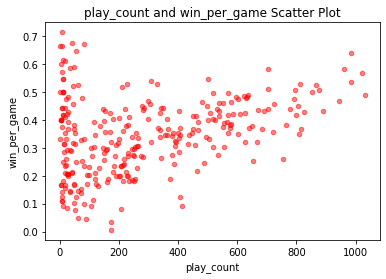

In [ ]:
bestteam4.plot(kind='scatter',x='play_count',y='win_per_game',color='r',alpha=0.5)
plt.xlabel('play_count')
plt.ylabel('win_per_game')
plt.title('play_count and win_per_game Scatter Plot')
plt.show

In [ ]:
bestteam5=bestteam4[(bestteam4['win_per_game']>0,4) and (bestteam4['play_count']>800)]
bestteam5.head()

,teams,play_count,total_score,result,win_per_game,goal_per_game
2,Brazil,985.0,2202,629,0.638579,2.235533
4,Germany,961.0,2119,560,0.582726,2.204995
1,England,1020.0,2199,580,0.568627,2.155882
3,Argentina,984.0,1780,529,0.537602,1.808943
12,Italy,812.0,1321,431,0.530788,1.626847


<function matplotlib.pyplot.show>

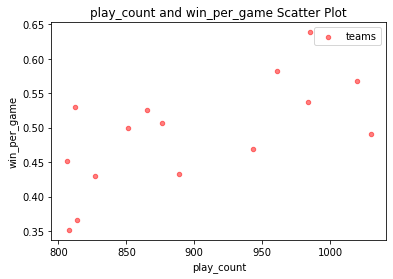

In [ ]:
bestteam5.plot(kind='scatter',x='play_count',y='win_per_game',color='r',alpha=0.5,label='teams')
plt.xlabel('play_count')
plt.ylabel('win_per_game')
plt.title('play_count and win_per_game Scatter Plot')
plt.show

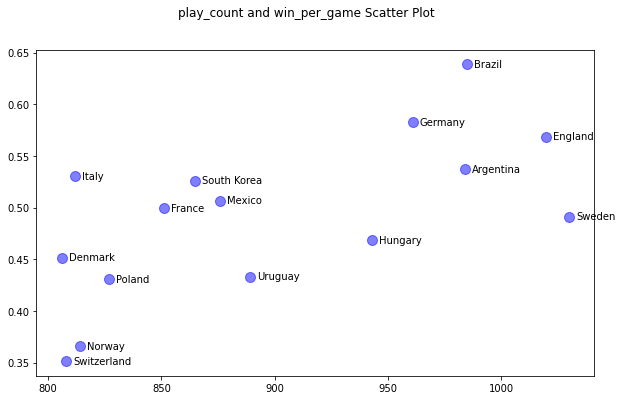

In [ ]:
# Create the figure and axes objects
fig, ax = plt.subplots(1, figsize=(10, 6))
fig.suptitle('play_count and win_per_game Scatter Plot')

# Plot the scatter points
x=bestteam5['play_count']
y=bestteam5['win_per_game']
labels=bestteam5['teams']
ax.scatter(x,y,
           color="blue",  # Color of the dots
           s=100,         # Size of the dots
           alpha=0.5,     # Alpha of the dots
           linewidths=1)  # Size of edge around the dots

# Add the participant names as text labels for each point
for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(7, 0),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered

plt.show()

In [ ]:
# Which teams dominated different eras of football

data.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year,Month,total_score,result,who_win
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,0,0,no_win
1,England,Scotland,4,2,Friendly,London,England,False,1873,3,6,1,England
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,3,1,Scotland
3,England,Scotland,2,2,Friendly,London,England,False,1875,3,4,0,no_win
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,3,1,Scotland


In [ ]:
teams=data[['Year','who_win']]
teams.head()

,Year,who_win
0,1872,no_win
1,1873,England
2,1874,Scotland
3,1875,no_win
4,1876,Scotland


In [ ]:
def re_find(who_win):
    if "no_win" not in who_win.lower():
        return True
    return False

teams2=teams[teams['who_win'].apply(re_find)]

teams2.head()

,Year,who_win
1,1873,England
2,1874,Scotland
4,1876,Scotland
5,1876,Scotland
6,1877,Scotland


In [ ]:
list1=[]
list2=[]
list3=[]
b=teams2['Year'].count()
for i in range(0,b):
    list1.append(teams2['Year'].iloc[i])
    list2.append(teams2['who_win'].iloc[i])
    a=str(teams2['Year'].iloc[i])+teams2['who_win'].iloc[i]
    list3.append(a)
    
list_label = ["Year","who_win","Year_who_win"] 
list_col = [list1,list2,list3]       
zipped = zip(list_label,list_col) 
data_dict = dict(zipped)  

teams3 = pd.DataFrame(data_dict)
teams3.head()    

,Year,who_win,Year_who_win
0,1873,England,1873England
1,1874,Scotland,1874Scotland
2,1876,Scotland,1876Scotland
3,1876,Scotland,1876Scotland
4,1877,Scotland,1877Scotland


In [ ]:
teams4=teams3.groupby('Year_who_win').count()
teams4=teams4[['who_win']].sort_values(by=['who_win'], ascending=False)
teams4.head()

,who_win
Year_who_win,
1997Brazil,20
1997China PR,17
2008Trinidad and Tobago,17
2001Saudi Arabia,17
1993Mexico,17


In [ ]:
#What trends have there been in international football throughout the ages - 
#home advantage, total goals scored, distribution of teams' strength et

data.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year,Month,total_score,result,who_win
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,0,0,no_win
1,England,Scotland,4,2,Friendly,London,England,False,1873,3,6,1,England
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,3,1,Scotland
3,England,Scotland,2,2,Friendly,London,England,False,1875,3,4,0,no_win
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,3,1,Scotland


In [ ]:
con=[(data['home_team']==data['who_win']),(data['away_team']==data['who_win'])]
val=['home_win','away_win']
val2=[1,1]
data['home_away_win']=np.select(con,val)
data['home_away_win2']=np.select(con,val2)
data.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year,Month,total_score,result,who_win,home_away_win,home_away_win2
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,0,0,no_win,0,0
1,England,Scotland,4,2,Friendly,London,England,False,1873,3,6,1,England,home_win,1
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,3,1,Scotland,home_win,1
3,England,Scotland,2,2,Friendly,London,England,False,1875,3,4,0,no_win,0,0
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,3,1,Scotland,home_win,1


In [ ]:
#home advantage?
data1=data.groupby('home_away_win').count()
data1[['who_win']]

,who_win
home_away_win,
0,9700
away_win,11926
home_win,20458


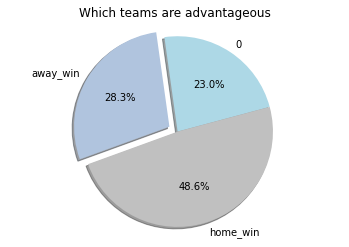

In [ ]:
my_colors = ['lightblue','lightsteelblue','silver']
my_explode = (0, 0.1, 0)
plt.pie(data1['who_win'], labels=data1.index, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Which teams are advantageous')
plt.axis('equal')
plt.show()

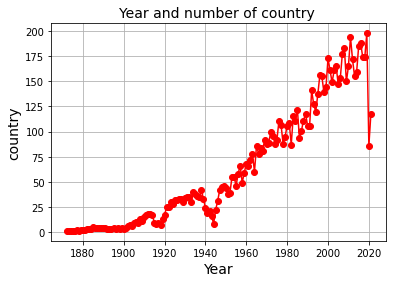

In [ ]:
#how has the number of countries changed 
data_c=data[['Year','country']]
data_c = data_c.drop_duplicates()
data_c1=data_c.groupby('Year').count()

plt.plot(data_c1.index, data_c1['country'], color='red', marker='o')
plt.title('Year and number of country ', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('country', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
#Which countries host the most matches where they themselves are not participating in
data_c = data.drop(data[data.country == data.home_team].index)
list1=[]
list2=[]
b=len(data_c.index)
for i in range(0,b):
    list1.append(data_c['country'].iloc[i])
    list2.append(1)

list_label = ["Country","Num"] 
list_col = [list1,list2]       
zipped = zip(list_label,list_col) 
data_dict = dict(zipped) 

data_c3 = pd.DataFrame(data_dict) 
data_c4=data_c3.groupby('Country').count()
data_c5=data_c4[['Num']]
data_c6=data_c5.sort_values(by=['Num'], ascending=False)
data_c6.head()

,Num
Country,
United States,772
Malaysia,428
France,375
South Africa,284
United Arab Emirates,276
